## Contruction of Blocks in Example 2.1, Matthews & Taylor

### 0. Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data

20


Text(0.5, 1.0, 'Scatterplot of sample X')

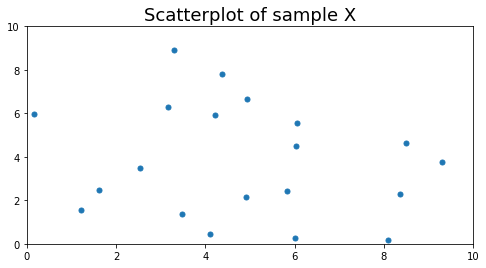

In [56]:
X = np.array([[4.91, 2.16], [6.05, 5.54], [3.48, 1.35], [8.09, 0.18], [2.53, 3.49],
             [1.62, 2.46], [8.37, 2.29], [3.17, 6.27], [6.02, 4.51], [8.50, 4.65],
             [4.21, 5.93], [0.15, 5.99], [9.31, 3.77], [4.10, 0.45], [5.83, 2.42],
             [6.00, 0.27], [3.30, 8.93], [4.38, 7.81], [4.93, 6.64], [1.22, 1.54]])

X = np.append(X, np.zeros((X.shape[0],1)), axis = 1)

N = X.shape[0]
# N = N[0]
print(N)

plt.figure(figsize=(8,4))
plt.plot(X[:,0], X[:,1], 'o', label = 'Data', zorder = 1, ms = 5)

#Etiquetas de los ejes
# plt.xlabel('Estado x', fontsize=18)
# plt.ylabel('fx|i(x)', fontsize=18)

plt.xlim(0,10)
plt.ylim(0,10)

plt.title('Scatterplot of sample X', fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()

### 2. Cutting functions

In [57]:
# each function is arbitrary and takes one of the components of the corresponding (x1, x2)
H = np.array([1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1])
print(H.shape[0])
# define the permutaions (arbitrary)
K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
print(K[:3])


20
[10  5 15]


### 3. Partition: Base Case

In [136]:
i = 0
# index of P to work with
Kindex = K[i]-1   # substract 1 to work in python index
# select cutting function
Hfun = H[Kindex]
# select the elements to sort
Xele = X[:, Hfun]
# select the Kindex th statistic
Xorder = np.sort(Xele)
print(Xorder)
xstat = Xorder[Kindex]
print(xstat)


TestE = range(4,10)
print(K)
print(list(K).index(9))

[0.15 1.22 1.62 2.53 3.17 3.3  3.48 4.1  4.21 4.38 4.91 4.93 5.83 6.
 6.02 6.05 8.09 8.37 8.5  9.31]
4.38
[10  5 15  3  7 12 18  2  4  6  8 11 13 16 19  1  9 14 17 20]
16


Text(0.5, 1.0, 'Scatterplot of sample X')

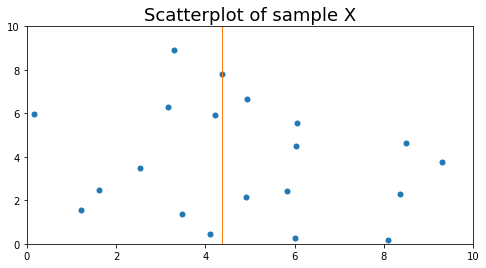

In [59]:
# plot
fig = plt.figure(figsize=(8,4))
plt.plot(X[:,0], X[:,1], 'o', label = 'Data', zorder = 1, ms = 5)
plt.plot(xstat*np.ones(2), np.array([0,10]), label = 'Partition', lw = 1)

#Etiquetas de los ejes
# plt.xlabel('Estado x', fontsize=18)
# plt.ylabel('fx|i(x)', fontsize=18)

plt.xlim(0,10)
plt.ylim(0,10)

plt.title('Scatterplot of sample X', fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()


#### Let's define a class to work with the blocks

In [115]:
class block():
    def __init__(self, vertices = None, elements = None, stats = None, parent = None, leftChild = None, rightChild = None):
        self.vertices = vertices   # array with 2 bidimensional elemntes, corresponding to the vertices of the block
                                   # vertices must be ordered starting from the left bottom vertix and finishin with the
                                   # right top vertix
                                   # the array must have two rows and two columns (bidimensional case)
        self.elements = elements   # array with the points that belong to the block. Each row contains an element and each
                                   # column is a dimension (in this case, bidimensional)
                                   # the third column is 0 if that element has been used to make a partition previusly, and
                                   # is 1 if not
        self.stats = np.sort(stats) # array with index of blocks
        self.parent = parent       # parent of the block
        self.leftChild = leftChild
        self.rightChild = rightChild
    
    def plot(self, color = 'C0', lw = 1):
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[0,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[1,0], self.vertices[:,1], color = color, lw = lw)
        plt.plot(self.vertices[:,0], np.ones(2)*self.vertices[1,1], color = color, lw = lw)
        plt.plot(np.ones(2)*self.vertices[0,0], self.vertices[:,1], color = color, lw = lw)
        
    def split(self, axis, korder):
        """
        axis indicates wheter it is along the X axis (vertical, 0) or the Y axis (horizontal, 1)
        korder is the order statistic to make the partition -> in python would be korder - 1
        """
        # select the dimension to sort
        Xele = self.elements[:,axis]
        # select the kth order statistic
        Xorder = np.sort(Xele)
        minStat = min(self.stats)
        korder = korder - minStat
        # find the first element which has not been used to use it now
        for j in range(self.elements.shape[0]-korder):
            find = False    # variable to break
            for i in range(self.elements.shape[0]):
                if self.elements[i,axis] == Xorder[korder] and self.elements[i,2] == 0:
                    # if satisfies this two condition, then we select it
                    xstat = Xorder[korder]
                    self.elements[i,2] = 1
                    find = True
                    break    # stop the searching (there should be one solution)
            if find:   # break the loop if we have already find the desired value
                break
            # if no one satisfies the condition, search the next korder
            korder = korder + 1
        # divide the stats
        statsL = self.stats[:korder+1]
        statsR = self.stats[korder+1:]
        # create the elements and vertices of each block
        Relements = np.empty((0, 3))
        Lelements = np.empty((0, 3))
        
        # add elements to vertices and elements for each case
        if axis == 0:
            Lvertices = np.array([self.vertices[0,:], [xstat, self.vertices[1,1]]])
            Rvertices = np.array([[xstat, self.vertices[0,1]], self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
        elif axis == 1:
            Lvertices = np.array([self.vertices[0,:], [self.vertices[1,0], xstat]])
            Rvertices = np.array([[self.vertices[0,0], xstat],self.vertices[1,:]])
            # now we move on the elements of the parent block and select wich ones go to the left and right child
            for l in range(self.elements.shape[0]):
                if Xele[l] <= xstat:
                    Lelements = np.append(Lelements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                else:   # Xele > xstat
                    Relements = np.append(Relements, [self.elements[l, :]], axis = 0)   # add the new element as a row
                
        # create the childs of the block
        Rchild = block(vertices = Rvertices, elements = Relements, stats = statsR, parent = self)  
        # right side or up side (the greaters elements)
        Lchild = block(vertices = Lvertices, elements = Lelements, stats = statsL, parent = self)   
        # left side or down side (the smaller elements)
        
        # asociate the childs to the parten
        self.rightChild = Rchild
        self.leftChild = Lchild
        # return the place where the partition was made
        return korder + minStat
        
        

[[1.  1.  0. ]
 [2.  3.  1. ]
 [4.  3.5 0. ]
 [3.  2.  0. ]
 [2.5 1.5 0. ]]
8
[4 5 6 7 8]
[9]
[[1.  1.  0. ]
 [2.  3.  1. ]
 [4.  3.5 1. ]
 [3.  2.  0. ]
 [2.5 1.5 0. ]]
[]
[[0.  0. ]
 [5.  3.5]]
[[0.  3.5]
 [5.  4. ]]


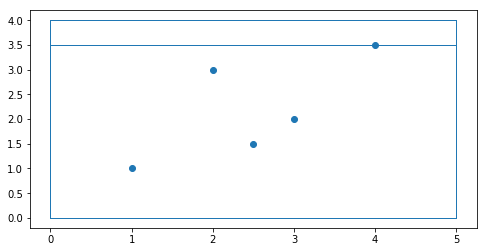

In [116]:
# test the class
Vertix = np.array([[0,0], [5,4]])
Elements = np.array([[1,1], [2,3], [4,3.5], [3,2],[2.5,1.5]])
Zrros = np.array([[0],[1],[0],[0],[0]])
Elements = np.append(Elements, Zrros , axis = 1)
print(Elements)
stats = range(1+3, Elements.shape[0]+2+3)
Bloque = block(vertices = Vertix, elements = Elements, stats = stats)

fig = plt.figure(figsize=(8,4))
# Bloque.plot(color = 'g')
plt.plot(Elements[:,0], Elements[:,1], 'o')

print(Bloque.split(axis = 1, korder = 7))
print(Bloque.leftChild.stats)
print(Bloque.rightChild.stats)
print(Bloque.leftChild.elements)
print(Bloque.rightChild.elements)
print(Bloque.leftChild.vertices)
print(Bloque.rightChild.vertices)

Bloque.leftChild.plot()
Bloque.rightChild.plot()


### 4. Partition: general case
#### We proceed to use the block class to apply the partition in a iterative loop

In [156]:
# create list with blocks
X[:,2] = np.zeros(N)
K = np.array([10, 5, 15, 3, 7, 12, 18, 2, 4, 6, 8, 11, 13, 16, 19, 1, 9, 14, 17, 20])
print(X)
First_Block = block(vertices = np.array([[0,0],[10,10]]), elements = X, stats = range(1,N+2))

Blocks_List = [First_Block]

for i in range(12):
    print(i)
    # search the last block that has the K[i] stat
    #print(K[i])
    for j in range(len(Blocks_List)):
        if K[i] in Blocks_List[j].stats and Blocks_List[j].leftChild == None:
            #print(H[K[i]-1])
            korder_new = Blocks_List[j].split(axis = H[K[i]-1], korder = K[i])
            if korder_new != K[i]:
                ind_new = list(K).index(korder_new)
                K[ind_new] = K[i]
                K[i] = korder_new
            Blocks_List.extend([Blocks_List[j].leftChild, Blocks_List[j].rightChild])
            print(Blocks_List[j].leftChild.stats)
            print(Blocks_List[j].rightChild.stats)
            #print(Blocks_List[j].leftChild.elements)
            #print(Blocks_List[j].rightChild.elements)
            break
            
print(K)

[[4.91 2.16 0.  ]
 [6.05 5.54 0.  ]
 [3.48 1.35 0.  ]
 [8.09 0.18 0.  ]
 [2.53 3.49 0.  ]
 [1.62 2.46 0.  ]
 [8.37 2.29 0.  ]
 [3.17 6.27 0.  ]
 [6.02 4.51 0.  ]
 [8.5  4.65 0.  ]
 [4.21 5.93 0.  ]
 [0.15 5.99 0.  ]
 [9.31 3.77 0.  ]
 [4.1  0.45 0.  ]
 [5.83 2.42 0.  ]
 [6.   0.27 0.  ]
 [3.3  8.93 0.  ]
 [4.38 7.81 0.  ]
 [4.93 6.64 0.  ]
 [1.22 1.54 0.  ]]
0
[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20 21]
1
[1 2 3 4 5]
[ 6  7  8  9 10]
2
[11 12 13 14 15]
[16 17 18 19 20 21]
3
[1 2 3 4]
[5]
4
[6 7]
[ 8  9 10]
5
[11 12 13]
[14 15]
6
[16 17 18]
[19 20 21]
7
[1 2]
[3 4]
8
[3]
[4]
9
[6]
[7]
10
[8]
[ 9 10]
11
[11]
[12 13]
[10  5 15  4  7 13 18  2  3  6  8 11 12 16 19  1  9 14 17 20]


### Now we plot the finals blocks

[5]
[14 15]
[16 17 18]
[19 20 21]
[1 2]
[3]
[4]
[6]
[7]
[8]
[ 9 10]
[11]
[12 13]


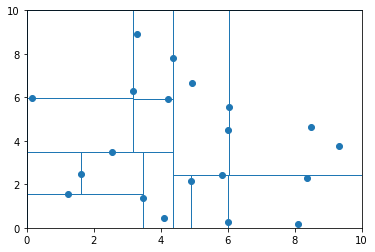

In [154]:
# plot
fig = plt.figure(figsize=(6,4))
# Bloque.plot(color = 'g')
plt.plot(X[:,0], X[:,1], 'o')

plt.xlim(0,10)
plt.ylim(0,10)

for j in range(len(Blocks_List)):
    if Blocks_List[j].leftChild == None:
        Blocks_List[j].plot()
        print(Blocks_List[j].stats)
        
# plt.plot([0,10], [0,0], color = 'white', lw = 1)
# plt.plot([0,10], [10,10], color = 'white', lw = 1)
# plt.plot([0,0], [0,10], color = 'white', lw = 1)
# plt.plot([10,10], [0,10], color = 'white', lw = 1)

In [ ]:
# ni haciendolo a mano coincide